# The Expected Value of an NBA Draft

## 1.0 Introduction

The game of basketball is forever changing. Trends come and go, teams rise and fall, players' legacies are constantly being  written and re-written. 

Perhaps more than in any other sport, a single player can be the difference maker for a franchise. While teams can acquire players through a few different methods (drafts, signings, and trades), some of the most compelling stories in the NBA explore a "Chosen One" narrative: a young prospect turned superstar that brings the team that drafted them into championship contetion. (Ex: Magic Johson, Tim Duncan, LeBron James)

For every success story, however, there are a few "busts" along the way. How often do we see a team place their hopes in some 19-20 year old touted as "The Next Michael Jordan" only for this same team to remain in the lottery for years to come? On the other end, there are some "hidden gems" taken later in the draft that surprise people with their production (Ex: Dennis Rodman, Manu Ginobili , Nikola Jokic)

Human behaviour is so difficult to predict and there are limitless factors that effect player performance. Teams might not always scout correctly or coach properly, and players might not perform or develop as expected. Win Shares, VORP, and Plus/Minus are far from perfect measures of player value, and there are so many unfounded expectations and overwhelming uncertainties. Such is the nature of the NBA Draft.

**In this article, I aim to quantify value of different draft picks and explore how draft position might be related to player performance**. We likely will not find a terribly strong, generalizable model in our analysis, but this exploration *might* still provide insight on the nature of NBA draft picks.

## 2.0 Methodology

**Sample**: We have pulled 22 draft classes (1989 to 2011) as our sample (n = 1322 draftees).

We begin from 1989 because the modern draft format (two rounds of draft picks) was introduced in 1989, and the NBA has kept the two-round format since then. We end with 2011 because there are players drafted in 2012 and beyond that might still produce "prime" seasons.

**Data Sources**: I pulled Draft Position data and Regular Season data from [Stathead.com][2]. Shoutouts to their team for assisting me on using their tools!

**Player Value**: To measure the “value” of each draftee, I am using a statistic referenced on [BoxScoreGeeks.com][1]: Brocato Prime Wins. We are interested in a draftee’s **five** best regular seasons organized by **total Win Shares** (WS). 

We will refer to this measure as "Prime Win Shares", "Prime Wins", or "Prime WS" from this point forward.

**Notes**:
1. What to do with draftees that did not play in the NBA or play 5 seasons?
    * We will include any/all the seasons we can, but seasons of absence we will fill with no production: 0 Win Shares.
    * Likewise, "non-players" will be treated as though they produced 0 Win Shares over their entire career.
    * We want to include these abscences because at the end of the day, we wish to determine the value of a draft pick. Even if the draft pick was used on a player that never played in the NBA, this should still be accounted for in our dataset.

2. Why use total Win Shares instead of time/pace adjusted measures?
    * I decided to use total Win Shares over Win Shares per 48 Minutes (WS/48), because I wanted to value overall impact over efficiency.
    * Players with high WS/48 might be highly efficient, but their impact is limited if they are rarely on the court.
    * A player with relatively lower WS/48 that plays many more minutes arguably provides greater utility for a team/franchise.

3. Why are we using the five best seasons?
    * According to [The Guardian][3], The average nba career length is around 4.9 years. Five seasons of data should cover the average nba career.
    * Using the five *best* seasons will give us an idea of the player's peak while balancing some level of longevity.

**Confounding Effects?**

1. Draft Position and Team Investment
    * Differences in draft position may be coupled with different degrees of team investment.
    * Franchises could be more inclined to build their team around a player on which they have used a higher draft pick. This would could positvely impact draftee's on court performance.
    * By design, higher draft picks are supposed to go to worse teams. Less talented prospects might not have to play as well to be awarded with more minutes, and on average, more minutes produces more Win Shares. 


2. Draft Position and Personal Investment
    * Differenes in draft position come with differences in player salary.
    * Players with more money can afford to invest in themselves to a greater degree.
    * While teams/coaches should be investing in their own players, and the NBA pays its players very well, there is still an inherent difference in pay between different picks of the same draft class.
    * Ex: In 1989, the first overall pick, Pervis Ellison, recieved \\$2.4 million from the Sacremento Kings. The first pick in the 2nd round (28th overall), Sherman Douglas, was only paid \\$325k. 
    

[1]:https://www.boxscoregeeks.com/articles/twenty-players-better-than-kobe "Some Kobe H8er Article"
[2]:https://stathead.com/tiny/Vmzxj "Sharable Query Link"
[3]:https://www.theguardian.com/sport/2015/nov/30/the-kobe-bryant-outlier-how-his-career-compares-to-the-nba-average#:~:text=Among%20the%203%2C668%20players%20Wilczynski,career%20length%20was%204.9%20years "The Kobe Bryant outlier"

In [168]:
#Importing Pandas and numpy
import pandas as pd
import numpy as np

In [15]:
#Loading the raw data
seasonDataRaw = pd.read_excel('SeasonStats_19892025.xlsx')
draftListRaw = pd.read_excel('DraftPosition_19892011.xlsx')

In [16]:
seasonDataRaw.head()

,Rk,Player,WS,Draft Team,Round,Pick,Draft Year,College,Season,Age,...,PER,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,Pos
0,201,Kenny Anderson,0.2,NJN,1,2,1991,Georgia Tech,2004-05,34,...,10.1,3.6,10.5,6.9,22.2,2.3,0.0,18.4,16.1,G
1,202,Nick Anderson,1.8,ORL,1,11,1989,Illinois,1989-90,22,...,14.9,6.1,12.7,9.3,10.5,1.8,1.0,13.7,22.1,F-G
2,203,Nick Anderson,3.1,ORL,1,11,1989,Illinois,1990-91,23,...,15.1,4.9,16.7,10.7,8.5,1.8,1.3,10.4,22.4,F-G
3,204,Nick Anderson,3.6,ORL,1,11,1989,Illinois,1991-92,24,...,16.4,4.8,14.9,9.7,12.4,2.2,0.9,9.7,24.5,F-G
4,205,Nick Anderson,7.7,ORL,1,11,1989,Illinois,1992-93,25,...,17.3,5.0,13.0,9.2,14.7,2.2,1.2,9.9,24.5,F-G


In [17]:
draftListRaw.head()

,Rk,Year,Lg,Rd,Pk,Tm,Player
0,1,1989,NBA,1,1,SAC,Pervis Ellison
1,2,1989,NBA,1,2,LAC,Danny Ferry
2,3,1989,NBA,1,3,SAS,Sean Elliott
3,4,1989,NBA,1,4,MIA,Glen Rice
4,5,1989,NBA,1,5,CHH,J.R. Reid


In [169]:
#Tapering down and merging the raw data into one dataframe.
#seasonData does not account for players that were drafted but didn't play in the NBA. Which is why we need to join on draftList
draftList = draftListRaw[['Player', 'Year', 'Pk']]
seasonData = seasonDataRaw[['Player', 'Season', 'WS', 'Draft Year', 'Pick']]
df0 = pd.merge(draftList, seasonData
               , left_on=['Year', 'Pk']
               , right_on= ['Draft Year', 'Pick']
               , how = 'left')

In [170]:
df0.head()

,Player_x,Year,Pk,Player_y,Season,WS,Draft Year,Pick
0,Pervis Ellison,1989,1,Pervis Ellison,1989-90,0.4,1989.0,1.0
1,Pervis Ellison,1989,1,Pervis Ellison,1990-91,4.0,1989.0,1.0
2,Pervis Ellison,1989,1,Pervis Ellison,1991-92,6.9,1989.0,1.0
3,Pervis Ellison,1989,1,Pervis Ellison,1992-93,3.9,1989.0,1.0
4,Pervis Ellison,1989,1,Pervis Ellison,1993-94,0.7,1989.0,1.0


In [171]:
#Cleaning and creating a final dataframe
df = df0[['Player_x', 'Season', 'WS', 'Year', 'Pk']]
df = df.rename(columns={'Player_x': 'Player'})
#Adding an ID column as there are some players with the same name (Ex: 'Michael Johnson')
df['ID'] = df['Year'].astype(str) + df['Pk'].astype(str).str.zfill(2)

In [172]:
df.head()

,Player,Season,WS,Year,Pk,ID
0,Pervis Ellison,1989-90,0.4,1989,1,198901
1,Pervis Ellison,1990-91,4.0,1989,1,198901
2,Pervis Ellison,1991-92,6.9,1989,1,198901
3,Pervis Ellison,1992-93,3.9,1989,1,198901
4,Pervis Ellison,1993-94,0.7,1989,1,198901


In [173]:
#Saving as an excel file
df.to_excel('WS_All.xlsx')

<ipython-input-173-a72707768786>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  df.to_excel('WS_All.xlsx')


In [174]:
def playerPrime(df, id, b, n):
#This function returns n number of a players best seasons best seasons based on statistic b
    df['WS'] = df['WS'].fillna(0)
    prime = df.groupby(id, dropna=False)[b].nlargest(n).groupby(id).sum()
    df_noDup = df[['Player', 'ID', 'WS', 'Year', 'Pk']].drop_duplicates(subset=['ID']) 
    df_merge = pd.merge(prime, df_noDup, left_on=['ID'], right_on= ['ID'], how = 'left')
    df_merge = df_merge.rename(columns={'WS_x': 'Prime_WS'})
    df_prime = df_merge[['Player', 'Prime_WS', 'Year', 'Pk', 'ID']]
    return(df_prime)


In [175]:
#Saving as an excel file and creating a new dataframe
df_prime = playerPrime(df, 'ID', 'WS', 5)
df_prime.to_excel('WS_Prime.xlsx')

df_prime.head()

<ipython-input-175-ef14056be805>:3: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  df_prime.to_excel('WS_Prime.xlsx')


,Player,Prime_WS,Year,Pk,ID
0,Pervis Ellison,19.2,1989,1,198901
1,Danny Ferry,22.7,1989,2,198902
2,Sean Elliott,39.7,1989,3,198903
3,Glen Rice,49.3,1989,4,198904
4,J.R. Reid,14.9,1989,5,198905


In [177]:
playerCount, classCount = df_prime['ID'].nunique(), df_prime['Year'].nunique()

print(f'There are ' +str(classCount)+ ' draft classes and ' +str(playerCount)+' players in our data set.')

There are 23 draft classes and 1322 players in our data set.


## 3.0 Analysis

### 3.1 Draft Position vs. Prime Wins: Ordinary Least Squares

In [149]:
#Importing statistical and visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [150]:
# Creating OLS model
ols_formula = 'Prime_WS ~ Pk'
OLS = ols(formula = ols_formula, data = df_prime)
model = OLS.fit()
model_results = model.summary()
# Display the model results.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Prime_WS   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     481.9
Date:                Wed, 14 May 2025   Prob (F-statistic):           2.66e-91
Time:                        14:02:34   Log-Likelihood:                -5314.5
No. Observations:                1322   AIC:                         1.063e+04
Df Residuals:                    1320   BIC:                         1.064e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.1452      0.750     34.881      0.000      24.675      27.616
Pk            -0.4875      0.022    -21.952      0.000      -0.531      -0.444
==============================================================================
Omnibus:                      276.726   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              561.786
Skew:                           1.207   Prob(JB):                    1.02e-122
Kurtosis:                       5.090   Cond. No.                         68.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Prime Wins')

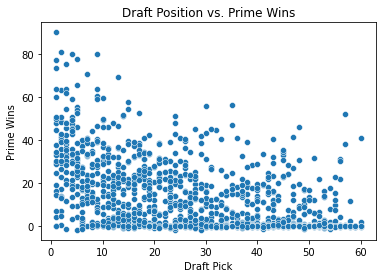

In [151]:
sns.scatterplot(x=df_prime['Pk'], y=df_prime['Prime_WS'])
plt.title('Draft Position vs. Prime Wins')
plt.xlabel('Draft Pick')
plt.ylabel('Prime Wins')

### 3.1.1 Linear Analysis: Initial Thoughts

The above shows all of the players plotted by their Draft Position & Prime Win Shares, a ordinarly least squares regression has also been applied to our data.

We *do* see that 'Pk'/'Draft Position' has a coefficent of **-0.4875** , signaling that teams generally select players that produce more Prime Wins earlier in the draft. We are able to generally oserve this trend from the scatterplot as well. The $R^2$ value is pretty weak at **0.267**.

Our current linear model is poorly describing our dataset. I am curious if applying a transform can improve our model, but I will test our below assumptions first to see if there is any additional insight I can gather from this analysis

    1. Linearity
    2. Independance
    3. Normality
    4. Homoscedasticity 

#### Assumption 1: Linearity

There is not a super clear pattern of the scatter from the below residual plot. Many players have close to 0 prime Win Shares, however that is to be expected given how I decided to set drafted players w/o playing time to having 0 prime Win Shares

Text(0.5, 1.0, 'Residual Plot')

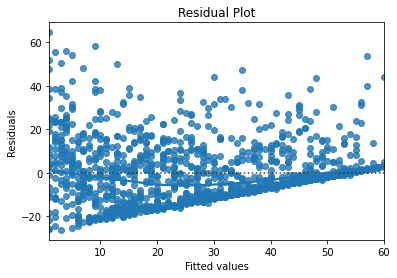

In [152]:
sns.residplot(x=df_prime['Pk'], y=df_prime['Prime_WS'], lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")

#### Assumption 2: Independance 

Admittedly, each draft pick (within the same draft) is NOT entirely independent of the other, but picks from one class to the other should be independent of one another, and for the purposes of our analysis, this could be sufficiently independent.

**Our Durbin-Watson metric of 1.817** from the above OLS Regression Results (section 3.1), indicate that there is no autocorrelation and therefore the observations are independent as this metric is between 1.5 to 2.5.

#### Assumption 3: Normality

Based on the Histogram and the Q-Q plot, we observe a strong right skew and some concavity. To address this skewness and better approximate normality, a **log transformation should be applied to the data**.

Text(0.5, 1.0, 'Normal Q-Q plot')

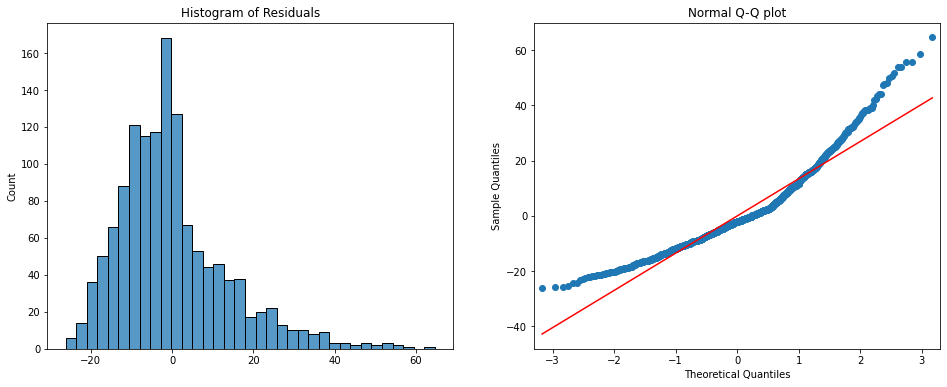

In [165]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # 1 row, 2 columns

residuals = model.resid
sns.histplot(residuals, ax = axes[0])
axes[0].set_title('Histogram of Residuals')

sm.qqplot(residuals, line='s', ax = axes[1]);
plt.title('Normal Q-Q plot')

## 3.2 Draft Position vs. Prime Wins:  Log Transformation

From a narrative perspective, an inverse logarithmic relationship between Draft Position and Prime Wins would make sense as the league tends to be somewhat "top heavy" between players when investigating most statistics. On [Basketball-Reference.com][2], it even states that when looking at BPM, "there are far more below-average players than above-average players in the league at any time".

If we ignore undrafted players and assume draft pools mimic the player pool of the entire NBA, we can excpect each draft to be comprised of a few strong performers, while most of the draft is made up of less impactful players. Hence, \***there can be a large difference between selecting 1st and selecting 5th**.

On the other side, the difference between **the 55th and 60th picks may be relatively small** for somewhat related reasons. Towards the end of the draft, so more draftees also become "non-players" in our dataset. Whether these picks are were caught in a contract with another league, or just weren't impressing NBA teams, many later picks end up with 0 Prime Win Shares in our dataset.

This might "dampen' the value of later draft picks and might keep the average measure of Prime Wins closer to 0 for the later draft positions.

[2]:https://www.basketball-reference.com/about/bpm2.html

\* Note: Aiming to find one value for a specific draft position is also pretty unreasonable since every draft class is different. High draft picks will hold inconsistent value from year to year depending on the strength of the prospects. The 1st overall pick in particular has varied wildly over the years. Even at the time of their respective drafts, LeBron James was a very different prospect from someone like Anthony Bennet, Andrea Bargnani, or even LeBron's own teammate Anthony Davis.

### 3.2.1 Draft Position vs. log(Prime Wins) Results:

In [155]:
#Applying the log transform
df_prime['log_PrimeWS'] = np.log(df_prime['Prime_WS']+(abs(df_prime['Prime_WS'].min())+1))

In [156]:
# Creating OLS model
ols_formulaLOG = 'log_PrimeWS ~ Pk'
OLSLog = ols(formula = ols_formulaLOG, data = df_prime)
modelLog = OLSLog.fit()
modelLog_results = modelLog.summary()
# Display the model results.
modelLog_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_PrimeWS   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     581.5
Date:                Wed, 14 May 2025   Prob (F-statistic):          9.44e-107
Time:                        14:02:53   Log-Likelihood:                -1756.7
No. Observations:                1322   AIC:                             3517.
Df Residuals:                    1320   BIC:                             3528.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1558      0.051     62.098      0.000       3.056       3.256
Pk            -0.0363      0.002    -24.114      0.000      -0.039      -0.033
==============================================================================
Omnibus:                       17.383   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.971
Skew:                           0.170   Prob(JB):                     0.000925
Kurtosis:                       2.629   Cond. No.                         68.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Prime Wins')

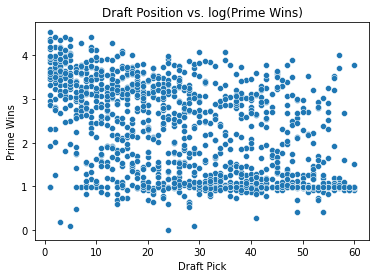

In [157]:
sns.scatterplot(x=df_prime['Pk'], y=df_prime['log_PrimeWS'])
plt.title('Draft Position vs. log(Prime Wins)')
plt.xlabel('Draft Pick')
plt.ylabel('Prime Wins')

We return a marginally stronger $R^2$ of **0.306**, but that isn't a particularly strong predictor.

#### Assumption 1: Linearity

Text(0.5, 1.0, 'Residual Plot')

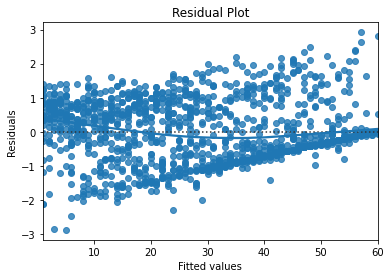

In [167]:
sns.residplot(x=df_prime['Pk'], y=df_prime['log_PrimeWS'], lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")

#### Assumption 2: Independance 

Again **our Durbin-Watson metric** is between 1.5 to 2.5 (**1.910**). So we fulfill our assumption of independance

#### Assumption 3: Normality cont.

The historgram of residuals and QQ plot look much better now, things look approximately normal.

Text(0.5, 1.0, 'Normal Q-Q plot')

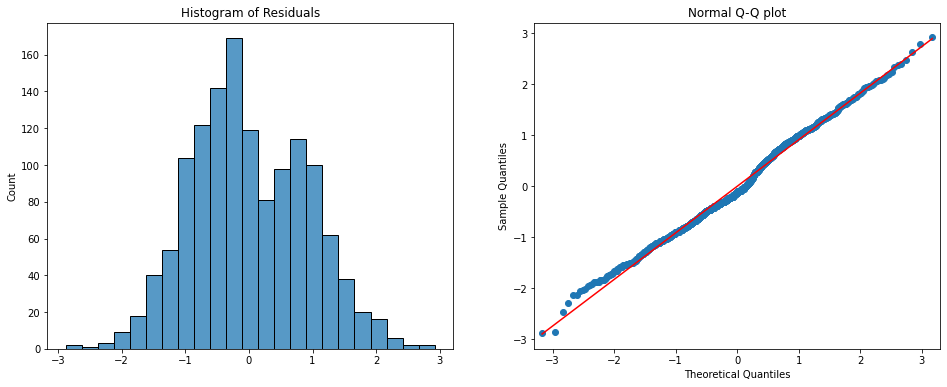

In [166]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # 1 row, 2 columns

residualsLog = modelLog.resid
sns.histplot(residualsLog, ax = axes[0])
axes[0].set_title('Histogram of Residuals')

sm.qqplot(residualsLog, line='s', ax = axes[1]);
plt.title('Normal Q-Q plot')

### 3.4 Bagging

Going to use bootstrap aggregation to reduce variance and build a model with more sampling

In [161]:
from sklearn.utils import resample
np.random.seed(34)

coefs = []
r2 = []
equation = []

for _ in range(50):
    sample = df_prime.sample(n=len(df_prime), replace = True)
    OLSSample = ols(formula = ols_formulaLOG, data = sample)
    modelSample = OLSSample.fit()
    
    coefs.append(modelSample.params)
    r2.append(modelSample.rsquared)
    equation.append(
        f'y = {modelSample.params[0]:.3f} + {modelSample.params[1]:.3f}x1'
    )
mean_coefs = np.mean(coefs, axis=0)

In [121]:
print(f'Bagged OLS Equation: log(Prime Wins) = {mean_coefs[0]:.3f} + {mean_coefs[1]:.4f} * Draft Position')
print(f'Mean R²: {np.mean(r2):.3f} (±{np.std(r2):.3f})')

Bagged OLS Equation: log(Prime Wins) = 3.167 + -0.0366 * Draft Position
Mean R²: 0.311 (±0.024)


### 3.2.2 Applying our Model

In this next section, I want to dive in to specific examples in NBA history where teams have traded draft picks.

As mentioned previously, this model (as it stands currently) is not very precise or accurate, but this should be an interesting exercise.

#### Example 1: The 1995 Shawn Respert Trade

June 28th 1995, the Detroit Pistons and the Portland Trail Blazers swapped a few selections that they had made that same day.

This is a good trade to analyze, as these picks are all from the same draft, the draft position had already been known, and none of these draftees had played in the NBA yet so everyone was still an uncertain prospect.

**Detroit Pistons**: 
* Traded Away: 1995 Pick \#8. (i.e. Shawn Respert)
* Recieved: 1995 Pick \#18, 1995 Pick \#19, and 1995 Pick \#58. (i.e. Theo Ratliff, Randolph Childress, and Don Reid)

**Portland Trail Blazers**:
* Traded Away: 1995 Pick \#18, 1995 Pick \#19, and 1995 Pick \#58. (i.e. Theo Ratliff, Randolph Childress, and Don Reid)
* Recieved: 1995 Pick \#8. (i.e. Shawn Respert)

**Expected**: If we were to use our log transformed model to predict Prime Win Shares (Section 3.2)
* Trail Blazers Recieved: \#8. This pick is expected to provide **15.573 Prime Wins**
* Pistons Received: \#18, \#19, and \#58, These picks are expected to provide **19.219 Prime Wins**

Our model suggests that the Blazers slightly lose this trade by around 3.646 Prime Wins (15.573 - 19.219). This is a pretty negligible margin, and this trade doesn't seem that bad/good for side.

**Actual**:
* Trail Blazers Recieved: Shawn Respert: 2.1
* Pistons Received: Theo Ratliff: 28.1, Randolph Childress: -0.2, and Don Reid: 11.8

In reality, the Trail Blazers lose this trade badly. None of the modeled values come very close to their respective projections anyway, so I'm not sure if I would've helped them very much.

Who knew Sixers Legend Theo Ratliff would be such a beast.

## 3.3 What if Every Team Drafts Perfectly? ("Re-draft")

With the first overall pick, every player is available to you. The second pick, every player minus 1. The third pick... so on and so forth. In a weird way, draft busts and steals only exist because of imperfect scouting/development.

In our fantasy scenario, let's see what happens if we assume that each selection in every draft was "perfect": i.e. they took the "best" player availalbe every time (we're assuming that the players' careers play out the same way cuz yolo).

In [52]:
def redraft(file):
    df = pd.read_excel(file) #Read the excel file in as a dataframe
    df = df.sort_values(by=['Draft Class','WS'], ascending=False, ignore_index=True) #Sort by Draft Class & Prime Wins
    counts = df['Draft Class'].value_counts()
    counts = counts.sort_index(ascending = False)
    
    redraft = []
    for draftClass in range(len(counts)):
        for pick in range(counts.iloc[draftClass]):
            redraft.append(pick+1)
    
    df['ReDraft Position'] = redraft
    df.to_excel('Redraft.xlsx', index=False)

In [53]:
redraft("Prime_WS.xlsx")

In [58]:
ScatterChart("Redraft.xlsx", 'ReDraft Position','WS')

In [59]:
LinearEquation("Redraft.xlsx", 'ReDraft Position' ,'WS')

Prime WS = (-0.839443035229705 * Draft Position) + 36.448807257895915
R^2: 0.7381229605116488


### 3.3.1 Re-Draft Results

With the benefit of hindsight, the correlation is much stronger than before. We established before, however, that our fantasy "Re-Draft" that the relationship appears to be more logrithmic. What if we apply the log transform to this data set as well?

### 3.3.2 Re-applying our Fantasy Model

Let's revisit our previous example now: The 1995 Shawn Respert Trade.

In [60]:
def LogTransform (file,stat):
    df = pd.read_excel(file) #Read the excel file in as a dataframe
    df['log(' + stat + ')'] = np.log(df[stat]+(abs(df[stat].min())+1)) #Log Transform the data
    df.to_excel('RePrime_logWS.xlsx', index=False) #Writing our transformed data in to a new Excel file

LogTransform("Redraft.xlsx", 'WS')

In [61]:
ScatterChart("RePrime_logWS.xlsx", 'ReDraft Position','log(WS)')

In [62]:
LinearEquation("RePrime_logWS.xlsx", 'ReDraft Position' ,'log(WS)')

Prime log(WS) = (-0.06437679953826883 * Draft Position) + 3.973033417102024
R^2: 0.9144215825701276


### 3.3.1 "Re-Draft" Position vs. log(Prime Wins) Results:

We return a fairly strong R-squared of 0.9144

## Remove Outliers

Track medians and inner quartiles of each Draft Position.

I expect to see wide ranges for early draft picks. Outside of the lottery, the range from Q1 to Q3 should probably shrink tremendously.

Work in Progress...

In [50]:
def BoxPlot(file,stat):
    df = pd.read_excel(file) #Read the excel file in as a dataframe
    fig = px.box(df, x="Draft Position", y= stat)
    fig.show()

In [51]:
BoxPlot("Prime_WS.xlsx",'WS')

### Example 2: Markelle Fultz Trade

As someone who grew up in Philadelphia and was a fan during The Process. This trade is something that keeps me up at night.

Work in Progress...

## Group by Draft Position (Lottery, Second Round, etc.)

Work in Progress...

## Group by *Drafted Postion* (Point Guard, Shooting Guard, Center, etc.)

Work in Progress...

## Group by Drafted Team (San Antonio, Cleveland Caveliers, etc.)

Work in Progress...